In [1]:
from ctgan import CTGAN
from ctgan import load_demo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
subj_test = pd.read_csv("./subj_test.csv")

subj_test

,workerID,aq_score_subset,opt_score,stroop_difference
0,5RXRA10,55,45.000000,173.820327
1,WKC0A11,61,45.000000,357.935109
2,3Q7CA11,42,118.750000,174.643199
3,D6DCA12,57,98.750000,51.326615
4,CAQQA12,47,96.818182,297.524953
...,...,...,...,...
175,60FCAW5,70,12.500000,95.100000
176,MGHCAX8,50,88.750000,204.411538
177,YWP8AXP,46,97.500000,89.301517
178,PUT1AYW,35,55.000000,116.619737


In [3]:
disc = ['workerID']

In [4]:
ctgan = CTGAN(epochs=1000)
ctgan.fit(subj_test, disc)


In [5]:
synth_samples = 180
subj_test_synth = ctgan.sample(synth_samples)

In [6]:
combined = pd.concat([subj_test, subj_test_synth])
vec = np.repeat(1, 180)
vec = np.append(vec, np.repeat(0, synth_samples))
combined['original'] = vec
combined

,workerID,aq_score_subset,opt_score,stroop_difference,original
0,5RXRA10,55,45.000000,173.820327,1
1,WKC0A11,61,45.000000,357.935109,1
2,3Q7CA11,42,118.750000,174.643199,1
3,D6DCA12,57,98.750000,51.326615,1
4,CAQQA12,47,96.818182,297.524953,1
...,...,...,...,...,...
175,B81SA32,29,80.441856,114.967691,0
176,E5KZA1Y,50,11.390167,94.375408,0
177,4O0KA2A,43,20.186743,129.969485,0
178,I8UEA5W,46,27.748689,231.986162,0


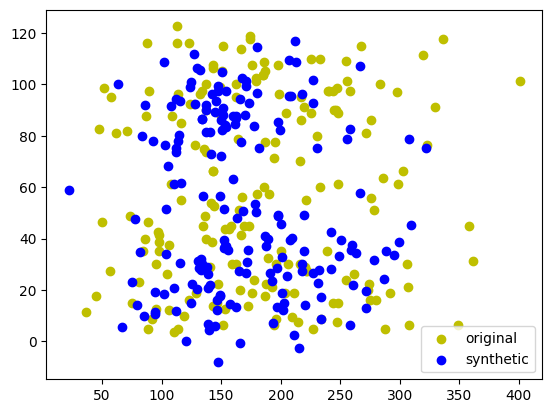

In [7]:
plt.scatter(data =subj_test, x='stroop_difference', y='opt_score', c='y', label='original')
plt.scatter(data =subj_test_synth, x='stroop_difference', y='opt_score', c='b', label='synthetic')
plt.legend()
plt.show()

In [8]:
subj_test_synth.to_csv("subj_test_synth.csv")